In [1]:
# Plots of ratio of merger rate for PBH mass range of (5 - 100) solar mass.


import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams
from matplotlib.colors import LogNorm


plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    



m_min = 5     #in units of M☉
m_max = 100   # in units of M☉

m_1 = 7       #in units of M☉
m_2 = 9      #in units of M☉



y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)

m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉

Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


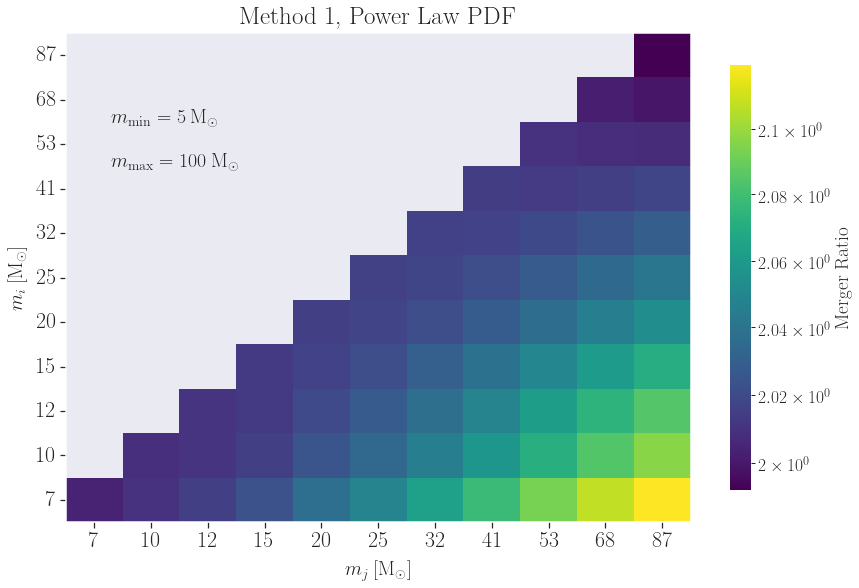

In [3]:
Merger_PWR1_nohalo = np.load('Merger_PWR1_nohalo.npy')
Merger_PWR1_halo_method_1 = np.load('Merger_PWR1_halo_method_1.npy')

Merger_PWR_ratio_1 = np.divide(Merger_PWR1_halo_method_1, Merger_PWR1_nohalo)


mask = np.tril(np.ones((11,11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(14, 9))  


sns.set(font_scale = 1.6)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'



vmin = np.min(Merger_PWR_ratio_1)
vmax = np.max(Merger_PWR_ratio_1)
norm = LogNorm(vmin, vmax)



ax = sns.heatmap(Merger_PWR_ratio_1, mask = mask,  cmap = 'viridis', cbar = True, norm = norm,  
                 cbar_kws = { "shrink": 0.87, 'label': 'Merger  Ratio'})




ax.set_xticklabels(m_1_list, fontsize = 10)
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 10)
ax.tick_params(left = True,  bottom = True)

ax.text(0.8, 9, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
ax.text(0.8, 8, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)



# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    
    
ax.invert_yaxis()
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlabel('$m_{j}\:[\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)     # m_j = m_2
plt.ylabel('$m_{i}\: [\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)    # m_i = m_1  and m_2 < equal to m_1.
plt.title(' Method 1, Power Law PDF', fontsize = 25, pad = 9)
plt.savefig('1rPWRLaw.pdf', bbox_inches = 'tight')
plt.show()     

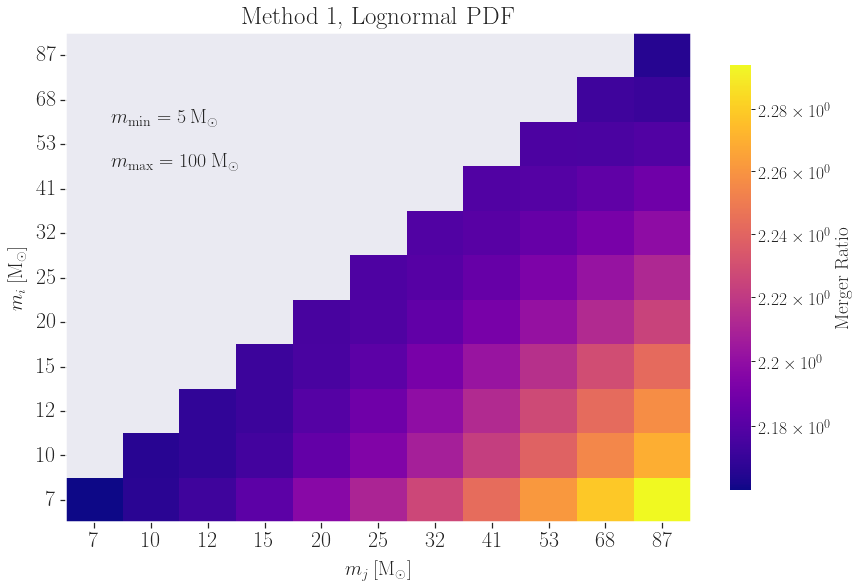

In [5]:
Merger_Lognormal1_nohalo = np.load('Merger_Lognormal1_nohalo.npy')
Merger_Lognormal1_halo_method_1 = np.load('Merger_Lognormal1_halo_method_1.npy')


Merger_Lognormal_ratio_1 = np.divide(Merger_Lognormal1_halo_method_1, Merger_Lognormal1_nohalo)

mask = np.tril(np.ones((11,11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(14, 9))  




sns.set(font_scale = 1.6)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'



vmin = np.min(Merger_Lognormal_ratio_1)
vmax = np.max(Merger_Lognormal_ratio_1)
norm=LogNorm(vmin, vmax)



ax = sns.heatmap(Merger_Lognormal_ratio_1, mask = mask,  cmap = 'plasma', cbar = True,  norm = norm, 
                 cbar_kws = { "shrink": 0.87, 'label': 'Merger Ratio'})




ax.set_xticklabels(m_1_list, fontsize = 10)
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 10)
ax.tick_params(left = True,  bottom = True)

ax.text(0.8, 9, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
ax.text(0.8, 8, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)



# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    
    
ax.invert_yaxis()
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlabel('$m_{j}\:[\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)     # m_j = m_2
plt.ylabel('$m_{i}\: [\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)    # m_i = m_1  and m_2 < equal to m_1.
plt.title(' Method 1, Lognormal PDF', fontsize = 25, pad = 9)
plt.savefig('1rLogNormalPDF.pdf', bbox_inches = 'tight')
plt.show()     

In [6]:
bin_centres = np.geomspace(2e-3, 96, 11)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(2e-3, 96, 11)
m_2 = np.geomspace(2e-3, 96, 11)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 
    


# To save some time I wrote them by hand.
m_1_list = [0.002, 0.01, 0.02, 0.05, 0.2, 0.4, 1, 4, 11, 33, 96] 
m_2_list = [0.002, 0.01, 0.02, 0.05, 0.2, 0.4, 1, 4, 11, 33, 96]


Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)



m_min = 1e-3  #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-9
X_max = 1e5



m_1 = [0.002, 0.01, 0.02, 0.05, 0.2, 0.4, 1, 4, 11, 33, 96] M☉

Δ_1 = [0.00226168, 0.00664593, 0.01952898, 0.05738571, 0.16862729, 0.49550949, 1.45604937, 4.27858558, 12.57257825, 36.94438751, 108.56068991]


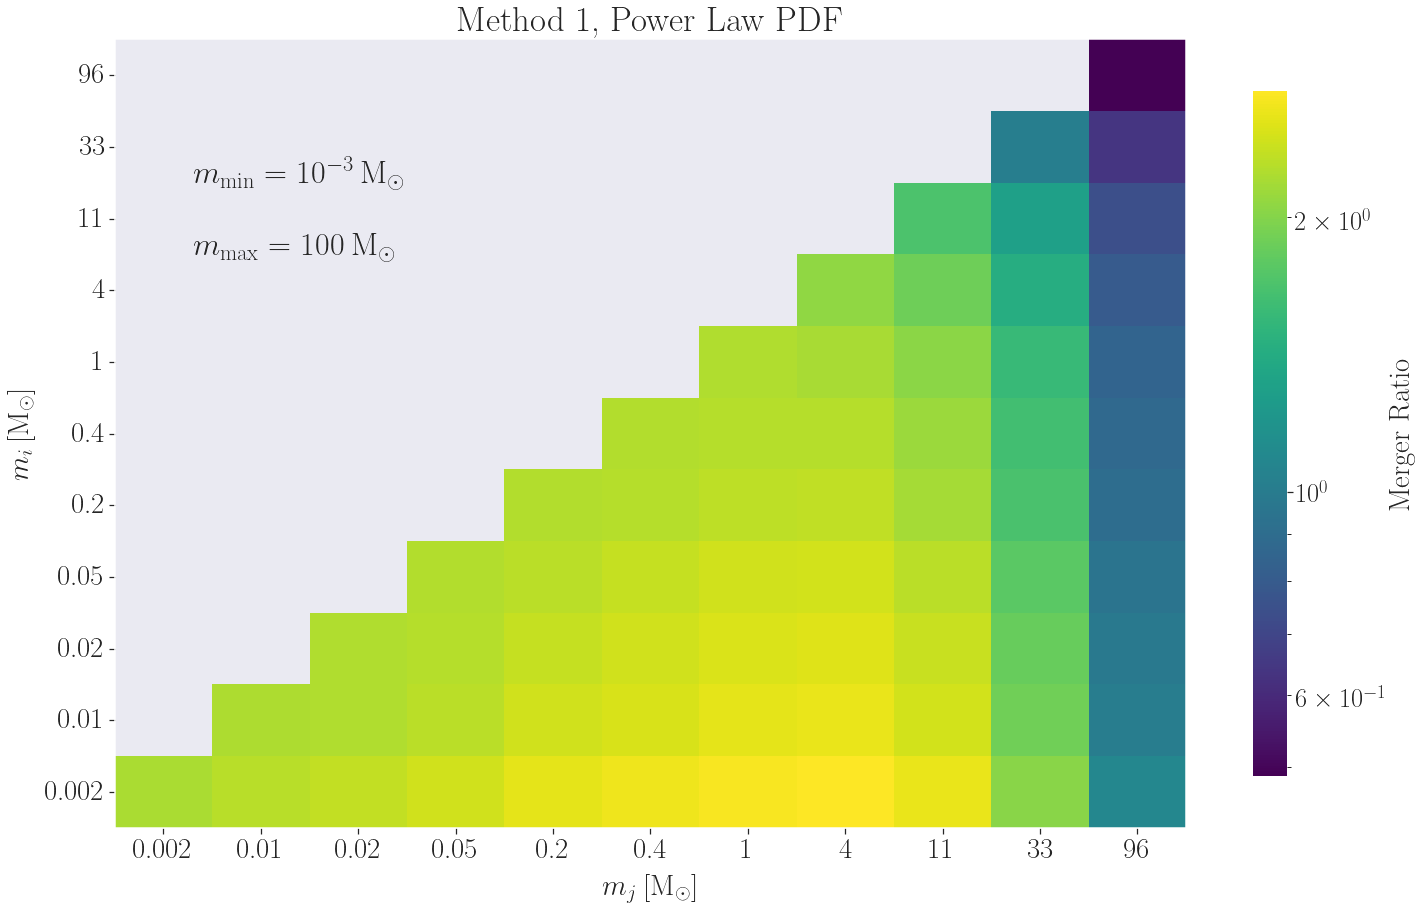

In [7]:
Merger_PWR2_nohalo = np.load('Merger_PWR2_nohalo.npy')
Merger_PWR2_halo_method_1 = np.load('Merger_PWR2_halo_method_1.npy')
Merger_PWR_ratio_2 = np.divide(Merger_PWR2_halo_method_1, Merger_PWR2_nohalo)



mask = np.tril(np.ones((11,11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(24, 14.5))  




sns.set(font_scale = 2.4)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'



vmin = np.min(Merger_PWR_ratio_2)
vmax = np.max(Merger_PWR_ratio_2)
norm = LogNorm(vmin, vmax)



ax = sns.heatmap(Merger_PWR_ratio_2, mask = mask,  cmap = 'viridis', cbar = True,  norm = norm, 
                 cbar_kws = { "shrink": 0.87, 'label': 'Merger Ratio'})




ax.set_xticklabels(m_1_list, fontsize = 10)
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 10)
ax.tick_params(left = True,  bottom = True)

ax.text(0.8, 9, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 32)
ax.text(0.8, 8, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 32)



# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    
    
ax.invert_yaxis()
plt.xticks(fontsize = 29)
plt.yticks(fontsize = 29)
plt.xlabel('$m_{j}\:[\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 9)     # m_j = m_2
plt.ylabel('$m_{i}\: [\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 9)    # m_i = m_1  and m_2 < equal to m_1.
plt.title(' Method 1, Power Law PDF', fontsize = 35, pad = 9)
plt.savefig('2rPWRLaw.pdf', bbox_inches = 'tight')
plt.show()     

/tmp/ipykernel_28983/2104877385.py:5: RuntimeWarning: invalid value encountered in true_divide
  Merger_Lognormal_ratio_2 = np.divide(Merger_Lognormal2_halo_method_1, Merger_Lognormal2_nohalo)


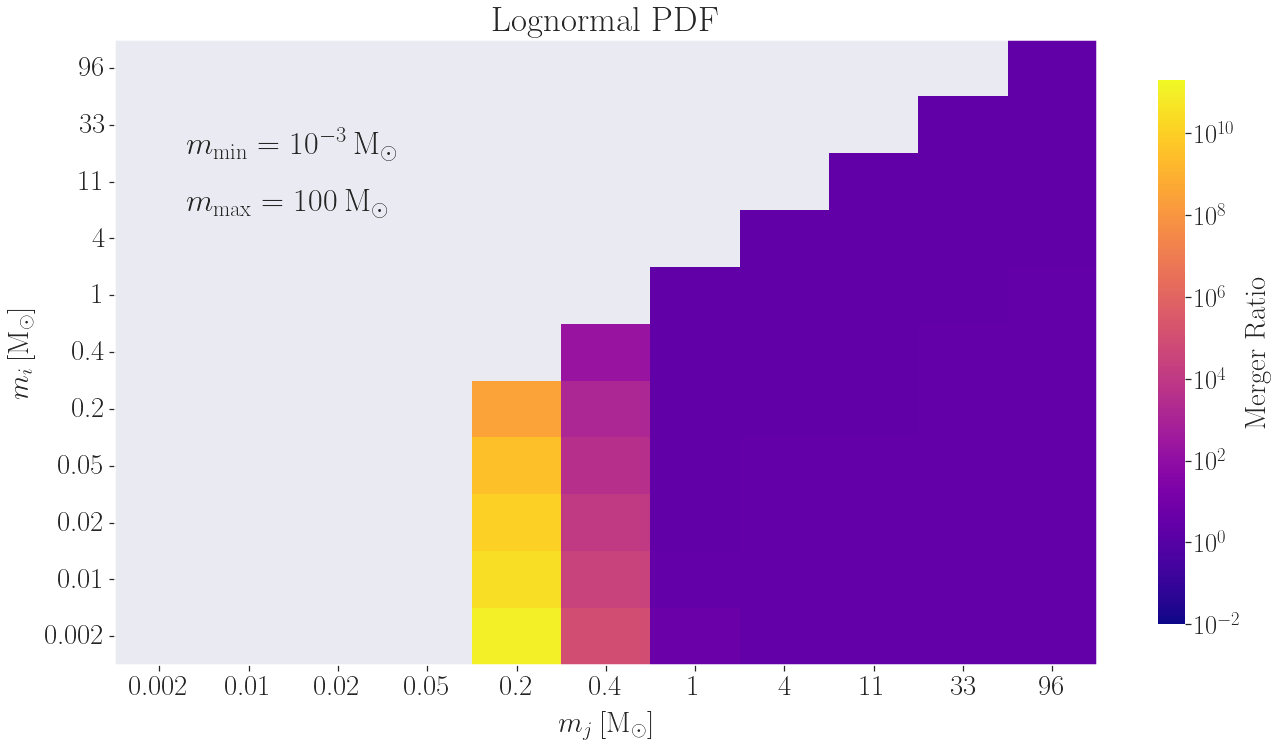

In [14]:
Merger_Lognormal2_nohalo = np.load('Merger_Lognormal2_nohalo.npy')
Merger_Lognormal2_halo_method_1 = np.load('Merger_Lognormal2_halo_method_1.npy')


Merger_Lognormal_ratio_2 = np.divide(Merger_Lognormal2_halo_method_1, Merger_Lognormal2_nohalo)

mask = np.tril(np.ones((11,11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(22, 11.5))  




sns.set(font_scale = 2.4)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'



vmin = 1e-2
vmax = 2e11
norm = LogNorm(vmin, vmax)



ax = sns.heatmap(Merger_Lognormal_ratio_2, mask = mask,  cmap = 'plasma', cbar = True,  norm = norm,
                 cbar_kws = { "shrink": 0.87, 'label': 'Merger Ratio'})




ax.set_xticklabels(m_1_list, fontsize = 10)
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 10)
ax.tick_params(left = True,  bottom = True)

ax.text(0.8, 9, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 32)
ax.text(0.8, 8, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 32)



# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    
    
ax.invert_yaxis()
plt.xticks(fontsize = 29)
plt.yticks(fontsize = 29)
plt.xlabel('$m_{j}\:[\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 9)     # m_j = m_2
plt.ylabel('$m_{i}\: [\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 9)    # m_i = m_1  and m_2 < equal to m_1.
plt.title(' Lognormal PDF', fontsize = 35, pad = 9)
plt.savefig('2rLogNormalPDF.pdf', bbox_inches = 'tight')
plt.show()     